In [5]:
import yfinance as yf

# Download Tesla stock data (last 5 years)
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="5y")

# Display first few rows
print(tesla_stock.head())


                                 Open        High         Low       Close  \
Date                                                                        
2020-09-08 00:00:00-04:00  118.666664  122.913330  109.959999  110.070000   
2020-09-09 00:00:00-04:00  118.866669  123.000000  113.836670  122.093330   
2020-09-10 00:00:00-04:00  128.736664  132.996674  120.186668  123.779999   
2020-09-11 00:00:00-04:00  127.313332  127.500000  120.166664  124.239998   
2020-09-14 00:00:00-04:00  126.983330  140.000000  124.433334  139.873337   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-09-08 00:00:00-04:00  346397100        0.0           0.0  
2020-09-09 00:00:00-04:00  238397400        0.0           0.0  
2020-09-10 00:00:00-04:00  254791800        0.0           0.0  
2020-09-11 00:00:00-04:00  182152500        0.0           0.0  
2020-09-14 00:00:00-04:00  249061800        0.0           0.0  


In [12]:
tesla_revenue = tesla.quarterly_financials.loc["Total Revenue"].reset_index()
tesla_revenue.columns = ["Date", "Revenue"]
print(tesla_revenue.head())


        Date       Revenue
0 2025-06-30  2.249600e+10
1 2025-03-31  1.933500e+10
2 2024-12-31  2.570700e+10
3 2024-09-30  2.518200e+10
4 2024-06-30  2.550000e+10


In [13]:
gme = yf.Ticker("GME")
gme_stock = gme.history(period="5y")
gme_stock.reset_index(inplace=True)
print(gme_stock.head())


                       Date    Open    High     Low   Close    Volume  \
0 2020-09-08 00:00:00-04:00  1.8875  2.0700  1.8700  1.9250  39266400   
1 2020-09-09 00:00:00-04:00  1.9900  1.9975  1.8275  1.8375  36272400   
2 2020-09-10 00:00:00-04:00  1.6625  1.7375  1.5475  1.5575  62233200   
3 2020-09-11 00:00:00-04:00  1.5650  1.5825  1.4675  1.5225  24244800   
4 2020-09-14 00:00:00-04:00  1.7000  1.7500  1.6075  1.7275  40476000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [14]:
gme_revenue = gme.quarterly_financials.loc["Total Revenue"].reset_index()
gme_revenue.columns = ["Date", "Revenue"]
print(gme_revenue.head())


        Date       Revenue
0 2025-04-30  7.324000e+08
1 2025-01-31  1.282600e+09
2 2024-10-31  8.603000e+08
3 2024-07-31  7.983000e+08
4 2024-04-30  8.818000e+08


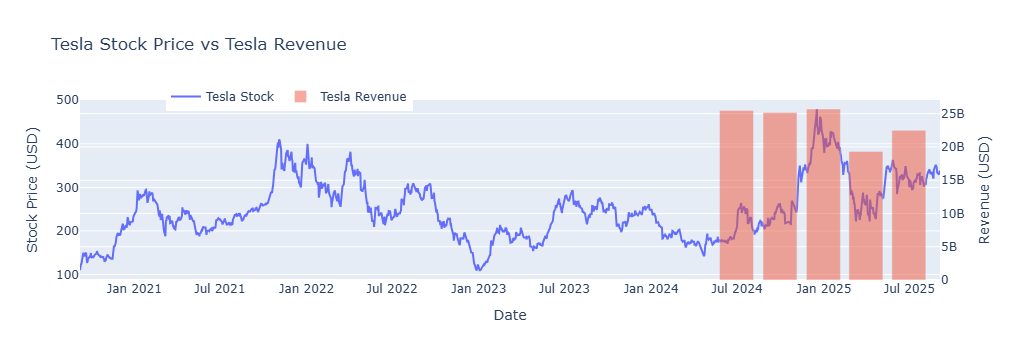

In [18]:
import plotly.graph_objects as go

def make_dashboard(stock, revenue, stock_title, revenue_title):
    fig = go.Figure()

    # Stock price
    fig.add_trace(go.Scatter(
        x=stock["Date"], y=stock["Close"],
        mode="lines", name=stock_title
    ))

    # Revenue
    fig.add_trace(go.Bar(
        x=revenue["Date"], y=revenue["Revenue"],
        name=revenue_title, yaxis="y2", opacity=0.5
    ))

    # Layout
    fig.update_layout(
        title=f"{stock_title} Price vs {revenue_title}",
        xaxis=dict(title="Date"),
        yaxis=dict(title="Stock Price (USD)"),
        yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right"),
        legend=dict(x=0.1, y=1.1, orientation="h")
    )

    fig.show()

# Tesla Dashboard
make_dashboard(tesla_stock, tesla_revenue, "Tesla Stock", "Tesla Revenue")


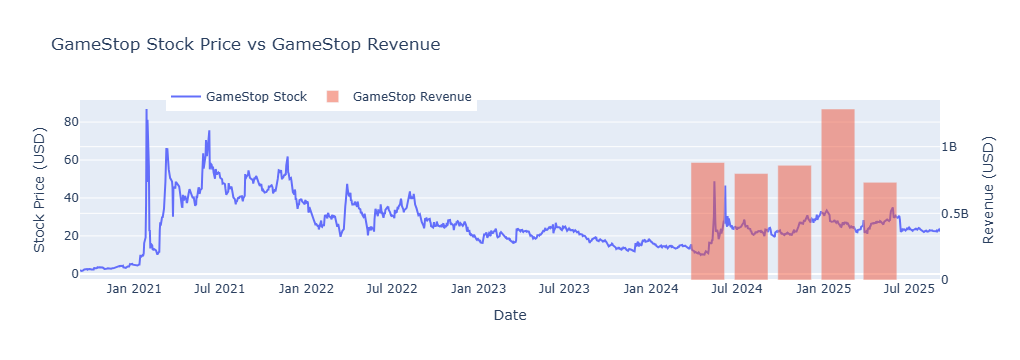

In [19]:
# GameStop Dashboard
make_dashboard(gme_stock, gme_revenue, "GameStop Stock", "GameStop Revenue")
